In [1]:
print('')

aim to plot change in gradient as consider changing minimum magntiude of data

In [36]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import pandas as pd
import math
import datetime
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from spearman_plotting_func import *

change magnitude limits, colors in functions file

In [5]:
filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20']

'''filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_005_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_01_new']

filenames = ['eq_object_05s_bandpass_01_19_snr_20_blank_0_new',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new', 
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new', 
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new']'''
filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr5', 
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr5', 
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr5', 
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr20', 
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr20', 
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20', 
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr20']

In [7]:
%matplotlib inline
for f in filenames[0:1]:
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
    df

eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr5


In [17]:
list_dist_Distance = df.iv2_distances
mags = np.array(df.eq_mag)
times = np.array(df.eq_time)

In [70]:
mag_hist, time_hist, dist_hist, n_hist  = [], [], [], []
for dist_list, mag, time in zip(list_dist_Distance, mags, times):
    if dist_list != []:
        for i in range(len(dist_list)):
            mag_hist.append(mag)
            time_hist.append(datetime.datetime.strptime(time,'%Y%m%d_%H%M%S'))
            dist_hist.append(float(str(np.array(dist_list[i]))[:-3]))
        n_hist.append(len(dist_list))

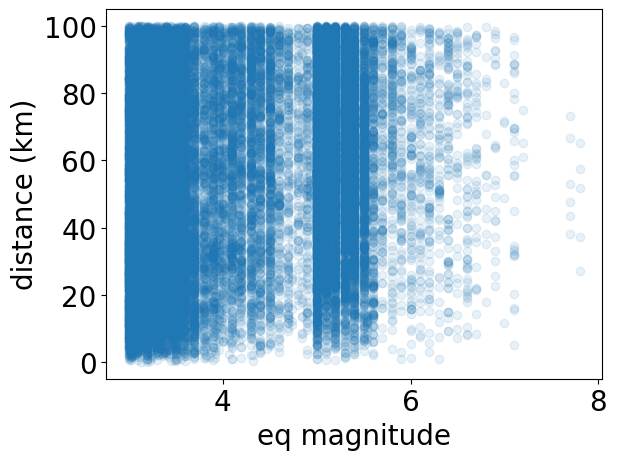

In [81]:
plt.scatter(mag_hist, dist_hist, alpha = 0.1)
plt.ylabel('distance (km)')
plt.xlabel('eq magnitude')
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/station_recordings/mag_dist.pdf')

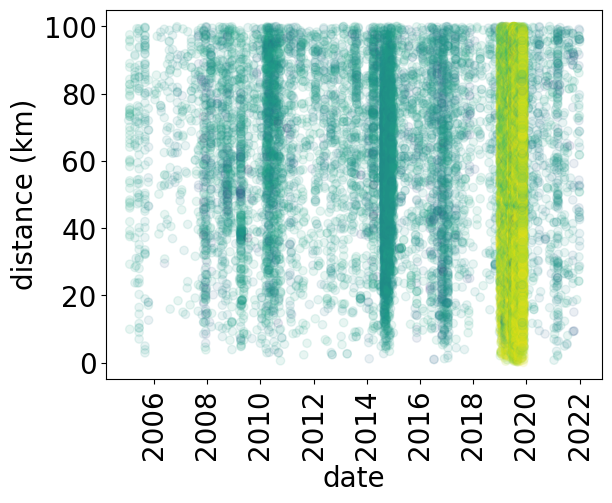

In [82]:
plt.scatter(time_hist, dist_hist, alpha = 0.1, marker = 'o', c= mag_hist, cmap = 'viridis_r')
plt.ylabel('distance (km)')
plt.xlabel('date')
plt.xticks(rotation = 90)
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/station_recordings/time_dist.pdf')

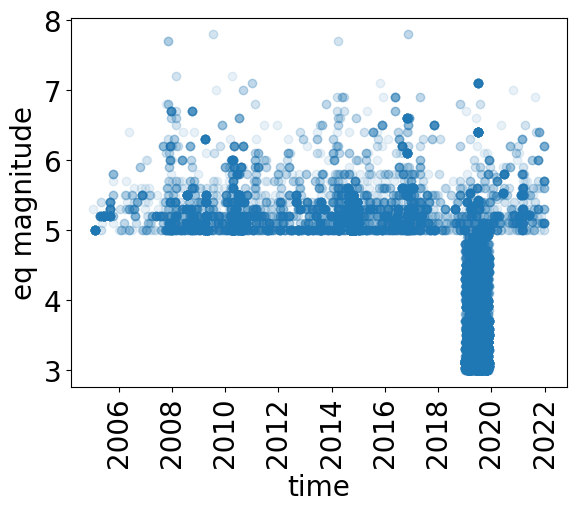

In [83]:
plt.scatter(time_hist, mag_hist, alpha = 0.1)
plt.xlabel('time')
plt.ylabel('eq magnitude')
plt.xticks(rotation = 90)
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/station_recordings/mag_time.pdf')

In [73]:
mag_data, time_data, n_data  = [], [], []
for dist_list, mag, time in zip(list_dist_Distance, mags, times):
    if dist_list != []:
        mag_data.append(mag)
        time_data.append(datetime.datetime.strptime(time,'%Y%m%d_%H%M%S'))
        n_data.append(len(dist_list))

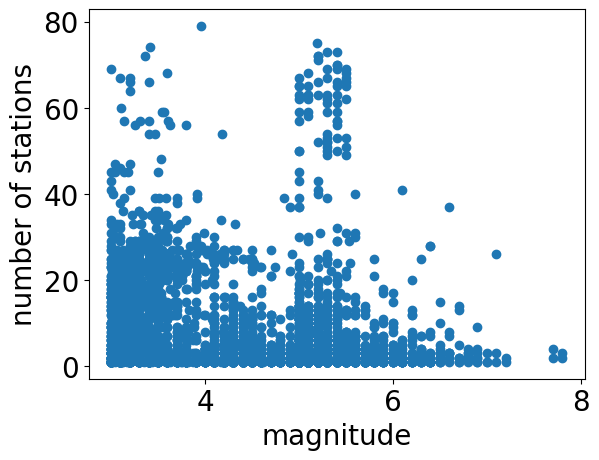

In [84]:
plt.scatter(mag_data, n_data)
plt.xlabel('magnitude')
plt.ylabel('number of stations')
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/station_recordings/mag_n.pdf')

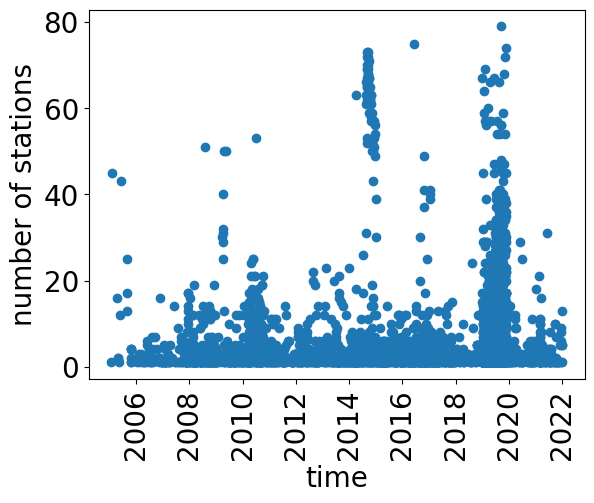

In [85]:
plt.scatter(time_data, n_data)
plt.xlabel('time')
plt.ylabel('number of stations')
plt.xticks(rotation = 90)
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/station_recordings/time_n.pdf')